## Importing Data Notebook

Code sources:
- https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python/blob/master/Geopandas_Intro_F2019_GC.ipynb
- https://rasterio.readthedocs.io/en/stable/

In [1]:
## Windows or Mac?
op_system = 'Mac'

In [2]:
# Create an object containing the file path to a master folder with the following folders:
    # code
        # 1_importing (This import notebook should be within this sub-folder)
        # 2_cleaning
        # 3_processing
        # 4_exploration
        # 5_analysis
        # 6_output
    # data
        # raw_data
        # processed_data
        
# Set the object `master` to your local file path of the master folder
# master = 'C:/Users/theaa/Desktop/Data Science Pedagogy Resources/Python/Human_Mobility_Project/Human_Mobility_Project'
master = '/Users/katewetstone/Desktop/CYPLAN 257 Data Science Human Mobility/Human_Mobility_Project'

### Installing and Importing Geopandas

Geopandas works for vector data. For raster data, use rasterio (see next section).

First, install Homebrew so that the `!brew install spatialindex` command  works. `spatialindex` is a dependency of `rtree`, which is a dependency of `geopandas`. To install Homebrew open a new Terminal window and enter the following command:

`!ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" < /dev/null 2> /dev/null`

When it prompts for your password, type in your computer's password and press Enter. Your password won't show up typed onto the screen but is still being entered.

Install libraries:

In [3]:
# Install os
if op_system == 'Windows' :
    !pip install os # Only for Windows

# Install zipfile
if op_system == 'Windows' :
    !pip install zipfile # Only for Windows

# Install wget
!pip install wget
# Install pysal
!pip install pysal
# Install mapclassify
!pip install mapclassify

# Install Geopandas dependencies
!pip install fiona 
!pip install shapely 
!pip install pyproj 
!brew install spatialindex # dependency of rtree
!pip install rtree

# Install Geopandas
!pip install geopandas
# Install descartes - Geopandas requirement
!pip install descartes

To reinstall 1.9.3, run `brew reinstall spatialindex`


Geopandas can also be installed directly from github. This still requires installing geopandas dependencies separately (`pandas fiona shapely pyproj rtree`)

To install directly from github: `!pip install git+git://github.com/geopandas/geopandas.git`

Import libraries:

In [4]:
# Import os and zipfile for Windows
import os
import zipfile

# Import wget    
import wget

# geopandas dependencies
import pandas as pd
import fiona 
import shapely
import pyproj
import rtree

# Import geopandas, mapclassify, and matplotlib
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
from matplotlib import pyplot

### Installing and Importing Rasterio

References: 
- https://rasterio.readthedocs.io/en/stable/
- https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

Note that geopandas only works for vector data.

In [5]:
if op_system == 'Mac' :
    !pip install rasterio

In [6]:
if op_system == 'Windows' :
    !conda config --add channels conda-forge
    !conda install rasterio

In [7]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.mask

## Fetch and Unzip Raw Data

Fetch data files with `wget`

In [30]:
# Set our current directory to the master folder
os.chdir(master)

Save the files as an object list `myfiles`

In [31]:
myfiles = ('TravelTime_50k.zip', 
           'World_Country_Borders.zip', 
           'PovMap_Global_Infant_Mortality.zip', 
           'val_prod.zip',
           'CELL5M.zip')

In [48]:
data_path = 'data/raw_data'

FLAG:
- This was giving errors  because the folder for raw didn't exist. I made the data/raw_data folder and added a placeholder txt file that we may need to keep in there even when we dump all the other stuff (I think empty folders can't exist on github)
- in the wget.download, I had to change the link (see below) for it to download correctly as a zipfile. before it wasn't able to recognize the files as zip files even after they downloaded

In [49]:
prefix = 'https://github.com/AaronScherf/Southern_Africa_Data/blob/master/'

for f in myfiles:
    wget.download(prefix+f+'?raw=true', out = data_path)

Unzip the data files

In [50]:
for f in myfiles:
    with zipfile.ZipFile(data_path+'/'+f, 'r') as zip_ref:
        zip_ref.extractall(data_path)

In [51]:
dir_name = master + '/' + data_path + '/CELL5M/Raster'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [52]:
# Set our current directory to the master folder
os.chdir(master)

## Reading in Vector Data with GeoPandas

Import the shapefile for country borders. Steps needed:
1. Import shapefile (done)
2. Change the bounds to only include southern Africa (to do)

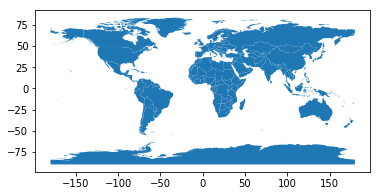

In [53]:
# read in borders shapefile
country_borders = gpd.read_file(data_path+'/'+
                                'World_Country_Borders/ne_50m_admin_0_countries.shp') 
# visualize country borders
country_borders.plot()

In [54]:
print("Country Borders CRS", country_borders.crs)

Country Borders CRS {'init': 'epsg:4326'}


In [55]:
southern_africa_countries = ('South Africa', 
                             'Angola', 
                             'Botswana',
                             'Lesotho',
                             'eSwatini',
                             'Namibia',
                             'United Republic of Tanzania',
                             'Zambia',
                             'Zimbabwe',
                             'Madagascar',
                             'Democratic Republic of the Congo',
                             'Mozambique',
                             'Malawi'
                            )

sum(country_borders['ADMIN'].isin(southern_africa_countries)) == len(southern_africa_countries)

True

In [56]:
southern_africa_borders = country_borders[country_borders['ADMIN'].isin(southern_africa_countries)]

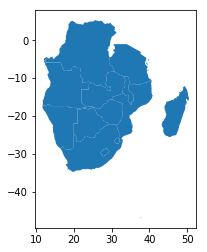

In [57]:
southern_africa_borders.plot()

In [58]:
southern_africa_borders.bounds

,minx,miny,maxx,maxy
0,25.224023,-22.402051,33.006738,-15.643066
1,21.978906,-18.041504,33.661523,-8.193652
43,29.323438,-11.716211,40.463574,-0.994922
49,30.787500,-27.309961,32.112891,-25.742969
56,16.447559,-46.962891,37.887695,-22.146289
101,11.721680,-28.938770,25.258789,-16.967676
102,30.221777,-26.861621,40.844531,-10.464355
116,32.670410,-17.131055,35.892773,-9.395020
117,43.257129,-25.570508,50.482715,-12.079590
124,27.051758,-30.642285,29.390723,-28.581738


In [59]:
max_lat = max(southern_africa_borders.bounds['maxx']) # right bound
min_lat = min(southern_africa_borders.bounds['minx']) # left bound
max_long = max(southern_africa_borders.bounds['maxy']) # top bound
min_long = min(southern_africa_borders.bounds['miny']) # bottom bound

In [60]:
southern_africa_box = shapely.geometry.box(min_lat, min_long, max_lat, max_long, ccw=True)

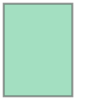

In [61]:
southern_africa_box

In [62]:
southern_africa_box.bounds

(11.7216796875, -46.962890625, 50.48271484375002, 5.3121093749999915)

In [63]:
# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# Write a new Shapefile
with fiona.open('data/raw_data/border_box.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(southern_africa_box),
        'properties': {'id': 123},
    })

## Read in Raster Data with Rasterio

Read in the data for variables to use in the principal component analysis.

FLAG: change the name of the zipfile to the name we want to save the saved version as (will be easier for when we incorporate data processing pipeline)

In [64]:
# Save a list of all of the names for datasets
pca_data_names = ['travel_time',
                 'infant_mort',
                  'val_prod',
                  'val_prod_per_ha']

In [65]:
# Save paths for all datasets
# FLAG: turn into a for loop once the names of paths matches 
#                   what we want them to be saved as
Paths = list()
Paths.append(data_path+'/'+'TravelTime_50k/Traveltime_50k.tif')
Paths.append(data_path+'/'+
             'PovMap_Global_Infant_Mortality/povmap_global_subnational_infant_mortality_rates_v2.tif')
Paths.append(data_path+'/'+'val_prod.tif')
Paths.append(data_path+'/'+'val_prod_per_ha.tif')

# Create a dataframe to store pca data through pipeline
pca_data = pd.DataFrame({'path':Paths},
                       index = pca_data_names)
pca_data

,path
travel_time,data/raw_data/TravelTime_50k/Traveltime_50k.tif
infant_mort,data/raw_data/PovMap_Global_Infant_Mortality/p...
val_prod,data/raw_data/val_prod.tif
val_prod_per_ha,data/raw_data/val_prod_per_ha.tif


In [66]:
# To access one path
pca_data.loc['travel_time','path']

'data/raw_data/TravelTime_50k/Traveltime_50k.tif'

In [67]:
# Create a list with raster data
rasters = list()
for name in pca_data_names:
    rasters.append(rasterio.open(pca_data.loc[name,'path']))

# add as a column to the pca dataframe
pca_data['raster'] = rasters

# To access one raster data file
pca_data.loc['travel_time','raster']

<open DatasetReader name='data/raw_data/TravelTime_50k/Traveltime_50k.tif' mode='r'>

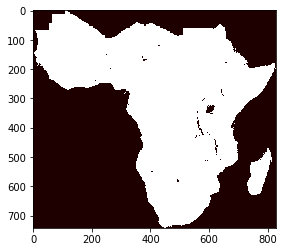

In [68]:
pyplot.imshow(pca_data.loc['travel_time','raster'].read(1), cmap='pink')

pyplot.show()

In [69]:
pca_data.loc['infant_mort','raster'].shape

(17173, 43200)

Next step: use dataset.transform to map pixel locations. See https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

All datasets for PCA should use the same coordinate reference system, `EPSG:4326`.

In [70]:
def check_crs(datasets, crs='EPSG:4326'):
    # Checks that all datasets use the same coordinate reference system
    # Returns true if all datasets use the crs specified
    check = True
    for dataset in datasets:
        if dataset.crs != crs:
            print(dataset.name)
            print(dataset.crs)
            check = False
    return check

check_crs(pca_data['raster'])

True

### Masking the Outline of Southern Africa from Raster files using Shapefile Boundaries

Code Source: 
Clipping Shapefile Vectors - https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/clip-vector-data-in-python-geopandas-shapely/

Masking Rasters using Vector Geometry - https://rasterio.readthedocs.io/en/stable/topics/masking-by-shapefile.html

In [71]:
# for raster in raster_data_paths:
for raster in pca_data['path']:

    with fiona.open("data/raw_data/border_box.shp", "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(raster) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
    
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rasterio.open(str(raster[:-4]) + '_mask.tif', "w", **out_meta) as dest:
        dest.write(out_image)

In [72]:
out_image.shape

(1, 628, 466)

In [73]:
# create list of masked data
Masked = list()
for name in pca_data_names:
    Masked.append(rasterio.open(
        pca_data.loc[name,'path'][:-4] + '_mask.tif'))

# add column for masked data to dataframe
pca_data['masked'] = Masked

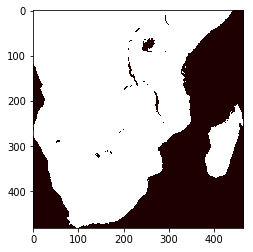

In [74]:
pyplot.imshow(pca_data.loc['travel_time','masked'].read(1), cmap='pink')

pyplot.show()

In [75]:
# create list of band data
raster_bands = list()
for name in pca_data_names:
    raster_bands.append(pca_data.loc[name,'masked'].read(1))

# add column for band data to dataframe
pca_data['band'] = raster_bands

In [101]:
# create list of dataframes
raster_dfs = list()
for name in pca_data_names:
    raster_dfs.append(pd.DataFrame(pca_data.loc[name,'band']))

# add column for dfs to pca_data
pca_data['df'] = raster_dfs

In [102]:
pca_data.loc['travel_time','df']

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,-3.402823e+38,3.221790e+00,2.780430e+00,3.993260e+00,7.146900e+00,7.865150e+00,3.611870e+00,5.482590e+00,7.988840e+00,3.531790e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
1,-3.402823e+38,9.353820e+00,7.522260e+00,3.387930e+00,3.398310e+00,3.288210e+00,3.363780e+00,7.217200e+00,7.432960e+00,2.663420e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
2,-3.402823e+38,1.624970e+01,1.127520e+01,4.183120e+00,2.238730e+00,2.221500e+00,6.318160e+00,1.104800e+01,7.445560e+00,2.445840e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,-3.402823e+38,1.862170e+01,1.204660e+01,5.359370e+00,2.044510e+00,5.443260e+00,9.346860e+00,1.293690e+01,7.719410e+00,2.379470e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
4,-3.402823e+38,1.537700e+01,1.207890e+01,5.581070e+00,2.021040e+00,7.027720e+00,8.944540e+00,8.815780e+00,6.122820e+00,2.088380e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
5,-3.402823e+38,7.952100e+00,7.063960e+00,2.461950e+00,2.715100e+00,6.446720e+00,3.497800e+00,2.862330e+00,3.437520e+00,2.102660e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
6,-3.402823e+38,2.248580e+00,2.100310e+00,2.142590e+00,1.637940e+00,2.921960e+00,1.774380e+00,2.368410e+00,1.349590e+00,1.472020e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
7,-3.402823e+38,6.253490e+00,6.788010e+00,4.533800e+00,1.370850e+00,1.585150e+00,2.052950e+00,1.227940e+00,9.880110e-01,1.453580e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
8,-3.402823e+38,6.625520e+00,4.826710e+00,2.410650e+00,8.279810e-01,1.253890e+00,8.386140e-01,9.815020e-01,1.936570e+00,2.551030e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
9,-3.402823e+38,3.036300e+00,1.559070e+00,9.060460e-01,6.544350e-01,2.856940e-01,9.357130e-01,1.693720e+00,1.298340e+00,2.149880e+00,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38


FLAG: Which of the data forms do we need to save and access? If there's ones that are just an intermediate step and we won't use later, we don't have to add them as columns to the data frame (or we can delete the column after we use it)

AS: Response: I think the DataFrame version of the first band is the only thing we will need for PCA. Keeping the raster files and bands could be helpful for plotting later though. So we should only have one column per variable type for the final PCA dataframe.

We still need to figure out how to convert the PCA-ready dataframe back into a map though so we can visualize the end result.

KW: Ok I'll keep the raster, masked, and df in the pca_data dataframe for us to reference. the df version is the only one I'll put into the actual PCA dataframe

FLAG: got to here with revising data processing pipeline using dataframe storage method

### Merge all PCA variables into one dataframe with full coordinates as index

In [ ]:
from random import randint

In [164]:
def pca_reshape(df):
    # argument: dataframe with x coord as index as y coords as columns
    nrows = df.shape[0]-1
    ncols = df.shape[1]-1
    
    # convert index to a column to melt
    df = df.reset_index()
    df = pd.melt(df, id_vars=['index'],
                value_vars=range(0,ncols))
    df = df.rename(columns={'index':'x', 'variable':'y'})
    
    # turn x and y columns into a coordinate index
    df['coords'] = df['x'].astype(str)+','+df['y'].astype(str)
    df = df.set_index('coords')
    df = df.drop(['x', 'y'], axis=1)
    return df

def check_reshape(raw, reshaped, n=10):
    # check that the raw and reshaped dfs have the same values 
    # for a random set of coordinates
    check = True
    for i in range(0,n):
        x = randint(0, raw.shape[0]-1)
        y = randint(0, raw.shape[1]-1)
        raw_val = raw.loc[x][y]
        new_val = reshaped.loc[str(x)+','+str(y)]['value']
        if raw_val != new_val:
            check = False
            print(x,',',y,'\nraw:',raw_val,'\nnew:',new_val)
    return check

In [165]:
name = 'travel_time'
raw = pca_data.loc[name,'df']
reshaped = pca_reshape(raw)
check_reshape(raw, reshaped)

In [168]:
for name in pca_data_names:
    

['travel_time', 'infant_mort', 'val_prod', 'val_prod_per_ha']

In [163]:
# EXTRA
# check that the new dataset has all the right values
df['y'] = df['y'].astype(str).astype(int)
print(df.dtypes)
df.describe(include='all')

# EXTRA

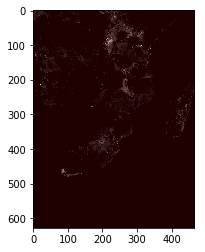

In [56]:
val_prod_band = val_prod_masked.read(1)

pyplot.show()

In [99]:
pd.DataFrame(val_prod_band)

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,-1.0,3.242249e+05,4.968730e+05,1.105983e+06,-1.000000e+00,1.466937e+06,1.447235e+06,4.894635e+05,8.333276e+05,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,8.547186e+05,4.370857e+05,1.158180e+06,-1.000000e+00,-1.000000e+00,1.584895e+06,1.404086e+06,1.479041e+06,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,4.546943e+05,9.843675e+05,-1.000000e+00,-1.000000e+00,2.558446e+06,1.762197e+06,8.956067e+05,5.129249e+05,1.284694e+06,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,1.053548e+06,1.828953e+06,-1.000000e+00,2.627440e+06,-1.000000e+00,1.591566e+06,1.077445e+06,8.760703e+05,5.298936e+05,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,8.320733e+05,9.547597e+05,1.816828e+06,1.877812e+06,2.306497e+06,-1.000000e+00,1.333368e+06,1.019223e+06,8.876698e+05,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,1.488400e+06,7.673141e+05,1.636302e+06,5.951796e+05,3.163322e+05,6.906802e+05,-1.000000e+00,9.729872e+05,5.515393e+05,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,1.703882e+06,1.787708e+06,1.569708e+06,9.934357e+05,8.375127e+05,1.377519e+06,9.897858e+05,9.749103e+05,1.156496e+06,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,2.753536e+06,2.284044e+06,1.661185e+06,4.385966e+05,6.025945e+05,1.221989e+06,8.657368e+05,2.157879e+06,9.360615e+05,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,3.688008e+06,3.699056e+06,2.344831e+06,6.908036e+05,8.581946e+05,1.166189e+06,4.009873e+05,2.262847e+06,1.447898e+06,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,4.019528e+06,2.186108e+06,8.109841e+05,1.362502e+06,1.635376e+06,8.583186e+05,2.411835e+05,6.022040e+05,7.484777e+05,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


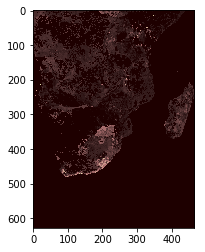

In [57]:
pyplot.imshow(val_prod_per_hect_masked.read(1), cmap='pink')

pyplot.show()

In [81]:
val_prod_per_hect_band = val_prod_per_hect_masked.read(1)
pd.DataFrame(val_prod_per_hect_band).shape

(628, 466)

In [89]:
rows = []
for r in raster_bands:
    row = pd.DataFrame(r).shape[0]
    rows.append(row)
    
min_row = min(rows)
min_row

482

In [105]:
travel_time_df_sub = travel_time_df[:min_row]
infant_mort_df_sub = infant_mort_df[:min_row]
val_prod_df_sub = val_prod_df[:min_row]
val_prod_per_hect_df_sub = val_prod_per_hect_df[:min_row]

In [121]:
travel_time_df_sub.shape == val_prod_df_sub.shape

True

In [116]:
travel_time_df_sub.pyplot.scatter()

AttributeError: 'DataFrame' object has no attribute 'pyplot'

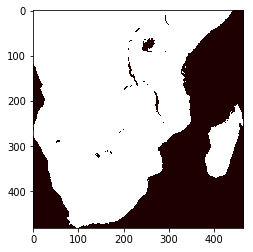

In [122]:
pyplot.imshow(travel_time_df_sub, cmap='pink')

pyplot.show()

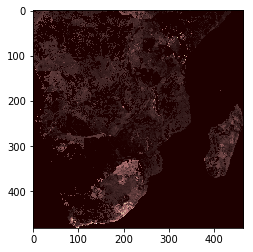

In [118]:
pyplot.imshow(val_prod_per_hect_df_sub, cmap='pink')

pyplot.show()

In [108]:
val_prod_df_sub.shape

(482, 466)

In [58]:
# check each dataset's upper left and lower right coordinates
# these coordinates are meters from the origin of the coordinate system
for dataset in raster_data_masked:
    print(str(dataset.name))
    print(dataset.transform*(0,0))
    print(dataset.transform*(dataset.width, dataset.height))
# FLAG: the bounds are not the same for each dataset. 

data/raw_data/TravelTime_50k/Traveltime_50k_mask.tif
(11.666666666988416, 5.3333333332066)
(50.5000000003062, -34.833333333444)
data/raw_data/PovMap_Global_Infant_Mortality/povmap_global_subnational_infant_mortality_rates_v2_mask.tif
(11.716666666666612, 5.318778284000032)
(50.48333333333326, -46.96455504933328)
data/raw_data/val_prod_mask.tif
(11.665900000000022, 5.333671999999993)
(50.499078000000026, -46.99945200000001)
data/raw_data/val_prod_per_ha_mask.tif
(11.665900000000022, 5.333671999999993)
(50.499078000000026, -46.99945200000001)


In [64]:
southern_africa_box.bounds

(11.7216796875, -46.962890625, 50.48271484375002, 5.3121093749999915)

In [21]:
# with rasterio.open(data_path+'/TravelTime_50k/Traveltime_50k.tif') as data_set:

    # Read the dataset's valid data mask as a ndarray.
#    mask = data_set.dataset_mask()

    # Extract feature shapes and values from the array.
#    for geom, val in rasterio.features.shapes(
            mask, transform=data_set.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
#        geom = rasterio.warp.transform_geom(
#            data_set.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
#        print(geom)

{'type': 'Polygon', 'coordinates': [[[37.25, 21.083333], [37.25, 21.0], [37.333333, 21.0], [37.333333, 21.083333], [37.25, 21.083333]]]}
{'type': 'Polygon', 'coordinates': [[[-17.083333, 21.0], [-17.083333, 20.916667], [-17.0, 20.916667], [-17.0, 21.0], [-17.083333, 21.0]]]}
{'type': 'Polygon', 'coordinates': [[[-16.333333, 19.583333], [-16.333333, 19.5], [-16.25, 19.5], [-16.25, 19.583333], [-16.333333, 19.583333]]]}
{'type': 'Polygon', 'coordinates': [[[6.0, 19.083333], [6.0, 19.0], [6.083333, 19.0], [6.083333, 19.083333], [6.0, 19.083333]]]}
{'type': 'Polygon', 'coordinates': [[[6.5, 18.25], [6.5, 18.166667], [6.583333, 18.166667], [6.583333, 18.25], [6.5, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.666667, 18.25], [6.666667, 18.166667], [6.75, 18.166667], [6.75, 18.25], [6.666667, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.25, 18.166667], [6.25, 18.083333], [6.333333, 18.083333], [6.333333, 18.166667], [6.25, 18.166667]]]}
{'type': 'Polygon', 'coordinates': [[[6.333333